# A modular halo model code for line intensity mapping

This example notebook demonstrates how to instantiate all the objects needed for the halo model calculation. These objects come with many useful methods, to plot their attributes. This notebook generates all the figures in the companion paper. Below, we only display the first few figures, to save space in the notebook. All the following ones are simply saved to file.

Each module below defines an object, used as an ingredient in the halo model calculation.

In [1]:
import universe
reload(universe)
from universe import *

import mass_function
reload(mass_function)
from mass_function import *

import sfr
reload(sfr)
from sfr import *

import luminosity_function
reload(luminosity_function)
from luminosity_function import *

import profile
reload(profile)
from profile import *

import p3d_rsd
reload(p3d_rsd)
from p3d_rsd import *

import lim_specs
reload(lim_specs)
from lim_specs import *

The Universe module loads the cosmological parameters, runs CLASS, and provides many useful routines related to the background cosmology and the linear perturbations.

In [2]:
# Basic functions and parameters, for background and fluctuations
u = UnivPlanck15()

# Redshift-space distortions

Below, we show the modeling of the finger-of-God effect we will be using for the small-scale redshift-space distortions.

/Users/eschaan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/eschaan/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


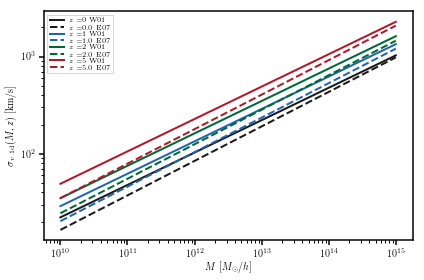

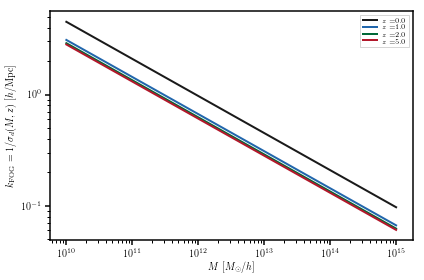

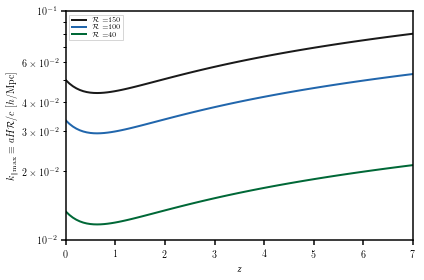

In [3]:
u.plotSigma2V1d()
u.plotSigma2DispFog()
u.plotKMaxParaSpectroRes()

Here are the maximum and minimum scales accessible across the line-of-sight (LOS), depending on the resolution and sky area.

universe.py:342: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. / s / self.bg.comoving_distance(z) # [h/Mpc]


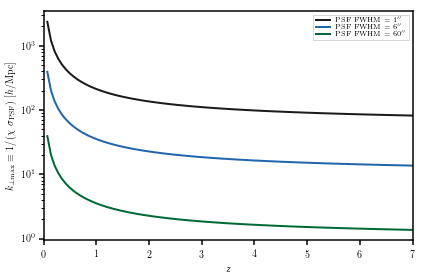

universe.py:394: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(np.pi/fSky)  / self.bg.comoving_distance(z)


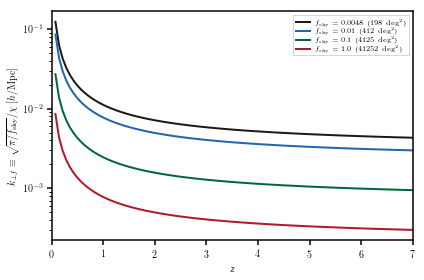

In [4]:
u.plotKMaxPerpPsf()
u.plotKFPerp()

#u.plotTradeOffNModes()

The mass function object computes the mass function and halo bias. Three versions are implemented from Sheth-Tormen, Press-Schechter and Tinker. You will need to change the flag to save=True the first time you run it, to precompute and interpolate them.

In [5]:
# Several mass functions implemented: Press-Schechter, Sheth-Tormen, Tinker
#massFunc = MassFuncPS(u, save=True)
massFunc = MassFuncST(u, save=False)
#massFunc = MassFuncTinker(u, save=True)

Loading mass function and biases


# Experimental specifications

Here, we choose a number of experimental specifications, for experiments similar to SPHEREx, HETDEX, CDIM, COMAP and CONCERTO. This object stores the beam, sky area, etc. It also computes the detector white noise level as a function of redshift

In [6]:
spherexSpecs = LimSpecs(u, exp='SPHEREx')
comapSpecs = LimSpecs(u, exp='COMAP')
concertoSpecs = LimSpecs(u, exp='CONCERTO')
hetdexSpecs = LimSpecs(u, exp='HETDEX')
cdimSpecs = LimSpecs(u, exp='CDIM')

'''
print floatExpForm(spherexSpecs.whiteNoisePower(0.8))
print floatExpForm(spherexSpecs.whiteNoisePower(1.))
print floatExpForm(spherexSpecs.whiteNoisePower(2.))
'''

'\nprint floatExpForm(spherexSpecs.whiteNoisePower(0.8))\nprint floatExpForm(spherexSpecs.whiteNoisePower(1.))\nprint floatExpForm(spherexSpecs.whiteNoisePower(2.))\n'

# Relation halo mass - star formation rate

This star formation rate (SFR) object connects the halo mass to stellar mass, and then the stellar mass to SFR. Several versions from several references are implemented.

In [7]:
#sfr = SfrFonseca16(u, massFunc)
#sfr = SfrMoster13(u, massFunc)
sfr = SfrMoster13Speagle14(u, massFunc, scatter=False, nProc=3, save=False)

We can plot these relations

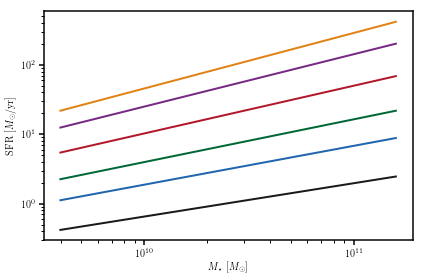

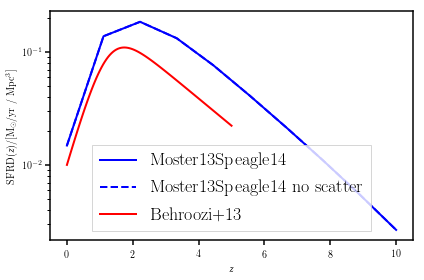

In [8]:
sfr.plotSfr()
sfr.plotSfrd()

In our halo model, the SFR determines the effective number density of halos, which controls the amplitude of the 1-halo power spectrum. It also answers the question of whether an intensity map is sparse in the 1-halo regime.

In [9]:
sfr.plotnHEff()
sfr.plotNHEffSparsitySummary()

vVox= [6.09257679e-05 1.01860770e-02 3.66403667e-02 7.68885526e-02
 1.27731152e-01 1.85964927e-01 2.48758215e-01 3.13803185e-01
 3.79328174e-01 4.44038815e-01 5.07033094e-01 5.67715254e-01
 6.25719943e-01 6.80850227e-01 7.33029226e-01 7.82263503e-01
 8.28615963e-01 8.72186118e-01 9.13095923e-01 9.51479740e-01
 9.87477335e-01 1.02122907e+00 1.05287270e+00 1.08254125e+00
 1.11036175e+00 1.13645453e+00 1.16093289e+00 1.18390298e+00
 1.20546403e+00 1.22570851e+00 1.24472246e+00 1.26258585e+00
 1.27937295e+00 1.29515273e+00 1.30998918e+00 1.32394170e+00
 1.33706543e+00 1.34941158e+00 1.36102772e+00 1.37195805e+00
 1.38224369e+00 1.39192289e+00 1.40103127e+00 1.40960200e+00
 1.41766602e+00 1.42525217e+00 1.43238741e+00 1.43909690e+00
 1.44540417e+00 1.45133122e+00 1.45689867e+00] (Mpc/h)^3
vVox= [6.41907804e-04 1.07319490e-01 3.86039243e-01 8.10090109e-01
 1.34576266e+00 1.95930790e+00 2.62089170e+00 3.30619901e+00
 3.99656374e+00 4.67834860e+00 5.34205003e+00 5.98139121e+00
 6.59252281e+00 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

The SFR also determines the effective source bias, which controls the amplitude of the 2-halo term.

In [10]:
sfr.plotBEff()

<Figure size 432x288 with 0 Axes>

Finally, we can look at the contribution of each halo mass to the mean intensity, 1-halo and 2-halo terms.

In [11]:
sfr.plotdlnAlldlnm(alpha=1.)
# sfr.plotdlnAlldlnm(alpha=0.6)
# sfr.plotdlnAlldlnm(alpha=1.1)

/Users/eschaan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


<Figure size 1152x504 with 0 Axes>

# Galaxy luminosity functions

The next ingredient needed for our halo model is the galaxy luminosity function for the line of interest. It determines the mean intensity, which normalizes the power spectrum, and the galaxy shot noise. We implement various fitting functions from the literature for Ha, Lya Oiii, Cii and CO.

In [12]:
lfHa = {}
lfHa['Sobral12'] = LFHaSobral12(u)
lfHa['Colbert13'] = LFHaColbert13(u)
lfHa['Cochrane17'] = LFHaCochrane17(u)
#lfHa['Egg'] = LFEGG(u, lineName='halpha')

lfOiii = {}
lfOiii['Colbert13'] = LFOiiiColbert13(u)
lfOiii['Mehta15'] = LFOiiiMehta15(u)
#lfOiii['5007Egg'] = LFEGG(u, lineName='o3_5007')
##lfOiii['4959Egg'] = LFEGG(u, lineName='o3_4959')

lfCii = {}
lfCii['Popping16'] = LFCiiPopping16(u)

lfCO = {}
lfCO['Popping16'] = LFCOPopping16(u, 1)   # CO 1-0 transition

lfLya = {}
lfLya['Cassata11'] = LFLyaCassata11(u)

For any luminosity function, its properties can be plotted.

In [13]:
#lf = lfHa['Cochrane17']
#lf.plotnGal()
#lf.plotMeanIntensity()
#lf.plotLf()
#lf.plotnGalEff()
#lf.plotShotNoise()
#lf.plotS2()
#lf.plotSchechterProperties()

#print lfOiiiMehta15.computeCorrCoeffHaOIII()
#lfOiiiMehta15.plotBivariateLf()

These are all Schechter functions, whose properties can be plotted.

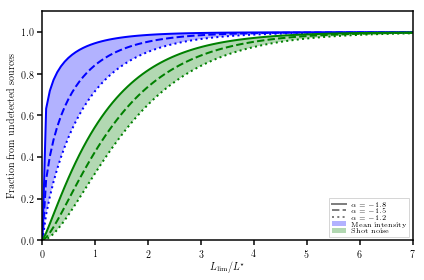

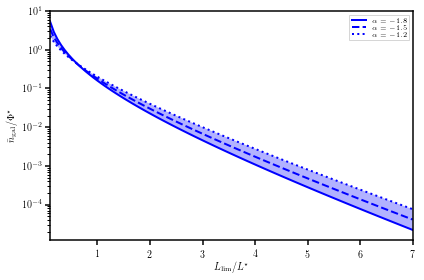

In [14]:
lf = LFHaCochrane17(u)
lf.plotSchechterProperties()

The luminosity function itself can be plotted.

In [15]:
lfHa['Cochrane17'].plotLf(lfs=[lfHa[key] for key in lfHa.keys()])
lfOiii['Colbert13'].plotLf(lfs=[lfOiii[key] for key in lfOiii.keys()])

# check that I reproduce fig 9 in Popping+16
#lfCii['Popping16'].plotLf(xLim=(1.e6, 1.e9), yLim=(1.e-6, 0.1), unit='Lsun')
lfCii['Popping16'].plotLf(xLim=(1.e6 * 3.846e33, 1.e9 * 3.846e33), yLim=(1.e-6, 0.1))

#unit = lfCO['Popping16'].convertLumUnit('cgs') / lfCO['Popping16'].convertLumUnit('Jy*km/s*Mpc^2')
#lfCO['Popping16'].plotLf(xLim=(1.e5*unit, 1.e10*unit), yLim=(10.**(-4.5), 10.**(-0.5)))
lfCO['Popping16'].plotLf(xLim=(1.e36, 1.e40), yLim=(10.**(-4.5), 10.**(-0.5)))

lfLya['Cassata11'].plotLf(xLim=(1.e41, 1.e44), yLim=(1.e-5, 0.1))

<Figure size 432x288 with 0 Axes>

Here we show the mean intensity

In [16]:
unit = 'Jy/sr'
lfHa['Sobral12'].plotMeanIntensity(lfs=[lfHa[key] for key in lfHa.keys()], unit=unit)
'''
lfOiii['Colbert13'].plotMeanIntensity(lfs=[lfOiii[key] for key in lfOiii.keys()], unit=unit)
lfCii['Popping16'].plotMeanIntensity(unit=unit)
lfCO['Popping16'].plotMeanIntensity(unit=unit)
lfLya['Cassata11'].plotMeanIntensity(unit=unit)
'''

"\nlfOiii['Colbert13'].plotMeanIntensity(lfs=[lfOiii[key] for key in lfOiii.keys()], unit=unit)\nlfCii['Popping16'].plotMeanIntensity(unit=unit)\nlfCO['Popping16'].plotMeanIntensity(unit=unit)\nlfLya['Cassata11'].plotMeanIntensity(unit=unit)\n"

<Figure size 432x288 with 0 Axes>

And the effective number density of galaxies, which controls the galaxy shot noise.

In [17]:
lfHa['Sobral12'].plotnGalEff(lfs=[lfHa[key] for key in lfHa.keys()])
'''
lfOiii['Colbert13'].plotnGalEff(lfs=[lfOiii[key] for key in lfOiii.keys()])
lfCii['Popping16'].plotnGalEff()
lfCO['Popping16'].plotnGalEff()
lfLya['Cassata11'].plotnGalEff()
'''

"\nlfOiii['Colbert13'].plotnGalEff(lfs=[lfOiii[key] for key in lfOiii.keys()])\nlfCii['Popping16'].plotnGalEff()\nlfCO['Popping16'].plotnGalEff()\nlfLya['Cassata11'].plotnGalEff()\n"

<Figure size 432x288 with 0 Axes>

This also determines the sparsity of the galaxies in the intensity map, in the shot noise regime.

In [18]:
'''
lfHa['Sobral12'].plotNGalEffSparsity(lfs=[lfHa[key] for key in lfHa.keys()], exp='SPHEREx', sfr=sfr)
lfOiii['Colbert13'].plotNGalEffSparsity(lfs=[lfOiii[key] for key in lfOiii.keys()], exp='SPHEREx', sfr=sfr)
lfCii['Popping16'].plotNGalEffSparsity(exp='CONCERTO', sfr=sfr)
lfCO['Popping16'].plotNGalEffSparsity(exp='COMAP', sfr=sfr)
lfLya['Cassata11'].plotNGalEffSparsity(exp='SPHEREx', sfr=sfr)
'''

lfHa['Sobral12'].plotNGalEffSparsitySummary()

vVox= [0.08899892 0.30909969 0.63625029 0.93377903] (Mpc/h)^3
vVox= [0.45033158 0.81849218] (Mpc/h)^3
vVox= [6.41652066e-06 4.17768782e+00 9.01410894e+00 1.36943802e+01
 1.53497388e+01] (Mpc/h)^3
vVox= [1.09508619e-07 7.12992055e-02 1.53840793e-01 2.04159076e-01
 2.33717422e-01 2.61968876e-01] (Mpc/h)^3


<Figure size 432x288 with 0 Axes>

Finally, the luminosity function determines the shot noise amplitude.

In [19]:
lfHa['Sobral12'].plotShotNoise(lfs=[lfHa[key] for key in lfHa.keys()])
'''
lfOiii['Colbert13'].plotShotNoise(lfs=[lfOiii[key] for key in lfOiii.keys()])
lfCii['Popping16'].plotShotNoise()
lfCO['Popping16'].plotShotNoise()
lfLya['Cassata11'].plotShotNoise()
'''

"\nlfOiii['Colbert13'].plotShotNoise(lfs=[lfOiii[key] for key in lfOiii.keys()])\nlfCii['Popping16'].plotShotNoise()\nlfCO['Popping16'].plotShotNoise()\nlfLya['Cassata11'].plotShotNoise()\n"

<Figure size 432x288 with 0 Axes>

We can compute the contribution of each luminosity bin to the mean intensity and galaxy shot noise.

In [20]:
lfHa['Sobral12'].plotdlnAlldlnL()

<Figure size 1152x432 with 0 Axes>

# Halo luminosity profiles: NFW and FOGs

The profile object below computes the NFW profiles assumed for the halo luminosity. It also includes the redshift-space distortions (supercluster infall effect and the finger-of-God effect).
We define one object for each line and each luminosity function reference.

In [21]:
profLimLfHa = {}
for key in lfHa.keys():
   profLimLfHa[key] = ProfLIMLF(u, sfr, lfHa[key], trunc=4., a=1.)

profLimLfOiii = {}
for key in lfOiii.keys():
   profLimLfOiii[key] = ProfLIMLF(u, sfr, lfOiii[key], trunc=4., a=1.)

profLimLfCii = {}
for key in lfCii.keys():
   profLimLfCii[key] = ProfLIMLF(u, sfr, lfCii[key], trunc=4., a=1.)

profLimLfCO = {}
for key in lfCO.keys():
   profLimLfCO[key] = ProfLIMLF(u, sfr, lfCO[key], trunc=4., a=0.6)

profLimLfLya = {}
for key in lfLya.keys():
   profLimLfLya[key] = ProfLIMLF(u, sfr, lfLya[key], trunc=4., a=1.)

Loading non-lin mass at z=0
Loading non-lin mass at z=0
Loading non-lin mass at z=0
Loading non-lin mass at z=0
Loading non-lin mass at z=0
Loading non-lin mass at z=0
Loading non-lin mass at z=0
Loading non-lin mass at z=0


We can thus compute the relation between halo mass and luminosity, taking into account the scaling as a function of SFR, and with a normalization given by the luminosity function.

In [22]:
profLimLfHa['Cochrane17'].plotLuminosityMassRelation()
'''
profLimLfOiii['Colbert13'].plotLuminosityMassRelation()
profLimLfCii['Popping16'].plotLuminosityMassRelation()
profLimLfCO['Popping16'].plotLuminosityMassRelation()
profLimLfLya['Cassata11'].plotLuminosityMassRelation()
'''

KS constant 14139568.921319058
KS constant 14069419.18196739
KS constant 14900937.957175218


"\nprofLimLfOiii['Colbert13'].plotLuminosityMassRelation()\nprofLimLfCii['Popping16'].plotLuminosityMassRelation()\nprofLimLfCO['Popping16'].plotLuminosityMassRelation()\nprofLimLfLya['Cassata11'].plotLuminosityMassRelation()\n"

<Figure size 432x288 with 0 Axes>

# Auto-spectrum of an intensity map

With all these ingredients, we are ready to introduce the power spectrum object! We focus first on the auto-spectrum. Again, we define one object for each line and luminosity function reference.

In [23]:
pRsdHa = {}
for key in lfHa.keys():
   pRsdHa[key] = P3dRsdAuto(u, profLimLfHa[key], massFunc, nProc=3)

pRsdOiii = {}
for key in lfOiii.keys():
   pRsdOiii[key] = P3dRsdAuto(u, profLimLfOiii[key], massFunc, nProc=3)

pRsdCii = {}
for key in lfCii.keys():
   pRsdCii[key] = P3dRsdAuto(u, profLimLfCii[key], massFunc, nProc=3)

pRsdCO = {}
for key in lfCO.keys():
   pRsdCO[key] = P3dRsdAuto(u, profLimLfCO[key], massFunc, nProc=3)

pRsdLya = {}
for key in lfLya.keys():
   pRsdLya[key] = P3dRsdAuto(u, profLimLfLya[key], massFunc, nProc=3)

In [24]:
key = 'Cochrane17'
p = pRsdHa[key]

For a given line and experiments, we can see which Fourier modes are being probed.

In [25]:
p.plotPMuDpdce(lfHa[key].Z[0], exp='SPHEREx')
'''
pRsdCO['Popping16'].plotPMuDpdce(2., exp='COMAP')
pRsdCii['Popping16'].plotPMuDpdce(6., exp='CONCERTO')
'''

perp k_min, k_max = 0.013026612457444343 41.42624763328355
para k_min, k_max = 0.003353470532771309 0.011794948327150622


"\npRsdCO['Popping16'].plotPMuDpdce(2., exp='COMAP')\npRsdCii['Popping16'].plotPMuDpdce(6., exp='CONCERTO')\n"

<Figure size 432x288 with 0 Axes>

We can compare the Fourier mode coverage for a few experiments.

In [26]:
p.plotFourierModes()


<Figure size 432x288 with 0 Axes>

Here we compare the power spectra predicted by different references for the luminosity function.

working on limsobral12halpha
working on limcochrane17halpha
working on limcolbert13halpha


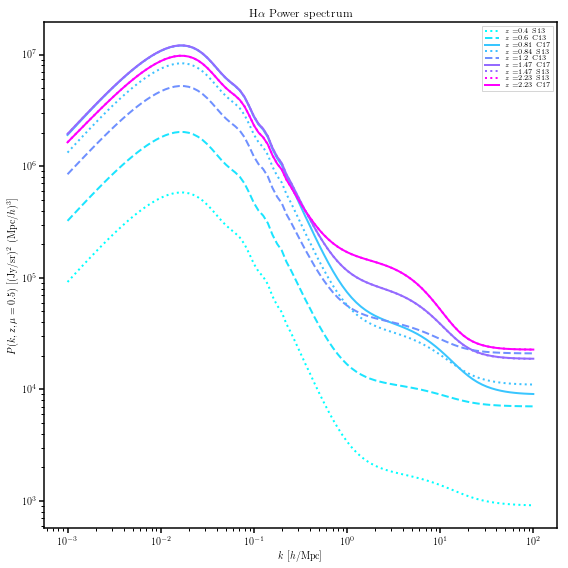

"\npRsdOiii['Colbert13'].compareP(ps=[pRsdOiii[key] for key in pRsdOiii.keys()])\npRsdCii['Popping16'].compareP()\npRsdCO['Popping16'].compareP()\npRsdLya['Cassata11'].compareP()\n"

In [27]:
pRsdHa['Cochrane17'].compareP(ps=[pRsdHa[key] for key in pRsdHa.keys()])
'''
pRsdOiii['Colbert13'].compareP(ps=[pRsdOiii[key] for key in pRsdOiii.keys()])
pRsdCii['Popping16'].compareP()
pRsdCO['Popping16'].compareP()
pRsdLya['Cassata11'].compareP()
'''

We show the contribution of each halo mass to the matter power spectrum, for modes across the LOS, or with any orientation with respect to the LOS.

In [28]:
p.plotCumulMassContributionP(mu=0)
p.plotMassContributionP(mu=0)

'''
p.plotCumulMassContributionP(mu=0.5)
p.plotMassContributionP(mu=0.5)
'''

[ 37657.02186871  41358.91410436  45414.35124265  49849.50419292
  54690.66767297  59963.63081701  65693.00945097  71900.60310265
  78605.09306611  85819.8233455   93552.26819927 101801.23836522
 110555.92959454 119792.50075896 129472.48736518 139538.80783141
 149912.91495948 160493.50095738 171152.89569269 181734.74428291
 192043.58646693 201852.99420053 210895.08373258 218874.23089931
 225449.1308506  230260.63376002 232930.15794532 233094.08746642
 230445.1709493  224766.39648377 216020.84171519 204395.5354565
 190355.61032711 174778.64182661 158644.01525445 143256.80485104
 129651.23637967 118481.72675533 109703.29546925 102280.52750469
  94373.21283225  84235.23453412  71750.92610672  59223.60151389
  49812.27398045  44414.9645951   40262.97559601  34011.60749858
  27222.18160292  23337.9263038   20590.74957783  16682.02839985
  14103.83329568  12038.67880462   9972.26913155   8525.08528084
   7187.46365772   6136.02560806   5279.69313266   4571.64655858
   4001.26232502   3542.28

[1.90125885e+06 2.09314010e+06 2.30334676e+06 2.53323533e+06
 2.78416876e+06 3.05748378e+06 3.35445631e+06 3.67621630e+06
 4.02373204e+06 4.39769520e+06 4.79849319e+06 5.22606435e+06
 5.67984867e+06 6.15861035e+06 6.66035564e+06 7.18212580e+06
 7.71984944e+06 8.26827540e+06 8.82078608e+06 9.36927704e+06
 9.90361686e+06 1.04120690e+07 1.08807480e+07 1.12943306e+07
 1.16351257e+07 1.18845174e+07 1.20228825e+07 1.20313733e+07
 1.18940641e+07 1.15997064e+07 1.11463866e+07 1.05437991e+07
 9.81605358e+06 9.00863779e+06 8.17231649e+06 7.37473552e+06
 6.66950136e+06 6.09053333e+06 5.63549872e+06 5.25072855e+06
 4.84084128e+06 4.31533553e+06 3.66822108e+06 3.01888422e+06
 2.53105502e+06 2.25126951e+06 2.03602545e+06 1.71198372e+06
 1.36007024e+06 1.15871885e+06 1.01629465e+06 8.13694752e+05
 6.80044692e+05 5.72983280e+05 4.65869400e+05 3.90839103e+05
 3.21494335e+05 2.66978278e+05 2.22571883e+05 1.85848870e+05
 1.56255737e+05 1.32430352e+05 1.13267789e+05 9.79229546e+04
 8.56573015e+04 7.588172

[ 3616.94993503  3773.99036046  3946.02873552  4134.17526818
  4339.54541665  4563.23318893  4806.28281605  5069.61905263
  5354.03436696  5660.09480323  5988.1173917   6338.05162935
  6709.43911368  7101.26837597  7511.90757476  7938.93506908
  8379.01857186  8827.86020611  9280.04370346  9728.93587353
 10166.24453505 10582.36371752 10965.9287441  11304.39805818
 11583.29218832 11787.37461292 11900.58450322 11907.49600319
 11795.07453074 11554.11392208 11183.04805827 10689.81152511
 10094.136636    9433.25150199  8748.70223334  8095.84825229
  7518.55652661  7044.57911608  6671.99819862  6356.88637808
  6021.19000347  5590.86323369  5061.02302418  4529.36030615
  4129.80729188  3900.38233859  3723.66738462  3457.916857
  3169.32851561  3003.71190658  2886.09289029  2719.16344914
  2608.32158224  2518.89417795  2429.08292128  2364.96851644
  2304.92705554  2256.24202386  2214.8865474   2178.66513548
  2146.85165846  2118.00961468  2090.84511391  2064.19573458
  2036.894547    2007.7911

'\np.plotCumulMassContributionP(mu=0.5)\np.plotMassContributionP(mu=0.5)\n'

<Figure size 432x288 with 0 Axes>

We show the 2-halo, 1-halo and shot noise terms.

In [29]:
p.plotPTermsZ(mu=0.)
'''
p.plotPTermsZ(mu=0.5)
'''
'''
for key in lfHa.keys():
   pRsdHa[key].plotPTermsZ(mu=0.)
   pRsdHa[key].plotPTermsZ(mu=0.5)
'''

'\nfor key in lfHa.keys():\n   pRsdHa[key].plotPTermsZ(mu=0.)\n   pRsdHa[key].plotPTermsZ(mu=0.5)\n'

<Figure size 432x288 with 0 Axes>

# RSD forecasts: detecting the power spectrum quadrupole

We forecast the SNR on the power spectrum monopole and quadrupole (marginalized or unmarginalized) for various experiments. 

In [30]:
# Halpha with SPHEREx
p.plotRequiredAreaToDetectA(kMax=0.1, exp='SPHEREx', marg=False)
p.plotRequiredAreaToDetectA(kMax=0.1, exp='SPHEREx', marg=True)
'''
# CO with COMAP
pRsdCO['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='COMAP', marg=False)
pRsdCO['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='COMAP', marg=True)

# [CII] with CONCERTO
pRsdCii['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='CONCERTO', marg=False)
pRsdCii['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='CONCERTO', marg=True)
'''

Load the precomputed RSD power spectrum at z=0.81
kPerpMax 0.1
kParaMax 0.011794948327150622
Load the precomputed RSD power spectrum at z=0.81
kPerpMax 0.1
kParaMax 0.011794948327150622
Load the precomputed RSD power spectrum at z=1.466
kPerpMax 0.1
kParaMax 0.012608366597611234
Load the precomputed RSD power spectrum at z=1.466
kPerpMax 0.1
kParaMax 0.012608366597611234
Load the precomputed RSD power spectrum at z=2.231
kPerpMax 0.1
kParaMax 0.013919935482002748
Load the precomputed RSD power spectrum at z=2.231
kPerpMax 0.1
kParaMax 0.013919935482002748
(3, 2)
Load the precomputed RSD power spectrum at z=0.81
kPerpMax 0.1
kParaMax 0.044231056226814836
Load the precomputed RSD power spectrum at z=0.81
kPerpMax 0.1
kParaMax 0.044231056226814836
Load the precomputed RSD power spectrum at z=1.466
kPerpMax 0.1
kParaMax 0.047281374741042125
Load the precomputed RSD power spectrum at z=1.466
kPerpMax 0.1
kParaMax 0.047281374741042125
Load the precomputed RSD power spectrum at z=2.231
kPerpM

/Users/eschaan/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:860: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)


(3, 2)


"\n# CO with COMAP\npRsdCO['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='COMAP', marg=False)\npRsdCO['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='COMAP', marg=True)\n\n# [CII] with CONCERTO\npRsdCii['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='CONCERTO', marg=False)\npRsdCii['Popping16'].plotRequiredAreaToDetectA(kMax=0.1, exp='CONCERTO', marg=True)\n"

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Cross-spectrum of two different lines

This new object computes the cross-spectrum of a pair of line intensity maps, in 3D redshift-space.

In [31]:
'''
# Example with high correlation coefficients: Ha - Oiii
# line correlation coefficient from Mehta+15
pHaOiii = P3dRsdCross(u, profLimLfHa['Cochrane17'], profLimLfOiii['Mehta15'], massFunc, r=0.65, nProc=3)
pHaOiii.plotCorrCoeff(Z=[1., 2.])
'''

# Example with low correlation coefficient: Lya - CO
# line correlation coefficient from EGG
pLyaCO = P3dRsdCross(u, profLimLfLya['Cassata11'], profLimLfCO['Popping16'], massFunc, r=0.088, nProc=3)
pLyaCO.plotCorrCoeff(Z=[3., 4.])

done 12
[2.38158356e-10 2.92360762e-10 3.58123180e-10 4.37116996e-10
 5.30767255e-10 6.39875240e-10 7.64146304e-10 9.01526964e-10
 1.04738146e-09 1.19358158e-09 1.32759971e-09 1.43173707e-09
 1.48371271e-09 1.46009119e-09 1.34620810e-09 1.15352028e-09
 9.33533218e-10 7.57397726e-10 6.45030931e-10 5.13723129e-10
 3.45009323e-10 2.65593321e-10 1.79259869e-10 1.30125561e-10
 8.65454208e-11 5.89907366e-11 4.08243246e-11 2.88328328e-11
 2.12964586e-11 1.65644840e-11 1.36176338e-11 1.17633726e-11
 1.05425151e-11 9.65295513e-12 8.89488759e-12 8.13723276e-12
 7.30073963e-12 6.35356439e-12 5.31323821e-12 4.24576135e-12
 3.25049412e-12 2.42539837e-12 1.82492307e-12 1.43839705e-12
 1.21270215e-12 1.08457200e-12 1.01215173e-12 9.71981786e-13
 9.50255079e-13 9.38751007e-13 9.32776164e-13]
done 11
[7.03230304e-11 8.36465669e-11 9.98116789e-11 1.19229211e-10
 1.42249455e-10 1.69069373e-10 1.99616537e-10 2.33386177e-10
 2.69238772e-10 3.05176313e-10 3.38119369e-10 3.63717381e-10
 3.76493436e-10 3.7068

done 22
[3.22764910e-10 3.95907039e-10 4.84654505e-10 5.91242476e-10
 7.17592980e-10 8.64794361e-10 1.03244513e-09 1.21777531e-09
 1.41453319e-09 1.61175575e-09 1.79255357e-09 1.93302561e-09
 2.00313879e-09 1.97128055e-09 1.81766521e-09 1.55774894e-09
 1.26100855e-09 1.02341927e-09 8.71849545e-10 6.94730449e-10
 4.67152437e-10 3.60031651e-10 2.43578735e-10 1.77306545e-10
 1.18526792e-10 8.13672556e-11 5.68765246e-11 4.07227980e-11
 3.05910289e-11 2.42613089e-11 2.03688646e-11 1.79939064e-11
 1.65363840e-11 1.56129031e-11 1.49807328e-11 1.44875551e-11
 1.40401939e-11 1.35872442e-11 1.31105385e-11 1.26200435e-11
 1.21463599e-11 1.17271576e-11 1.13902272e-11 1.11401488e-11
 1.09704838e-11 1.08573118e-11 1.07831088e-11 1.07351505e-11
 1.07045774e-11 1.06853512e-11 1.06734565e-11]
done 12
[1.33055222e-10 1.61973339e-10 1.97061292e-10 2.39202767e-10
 2.89157619e-10 3.47356043e-10 4.13639122e-10 4.86911375e-10
 5.64700527e-10 6.42671261e-10 7.14144663e-10 7.69669099e-10
 7.97368095e-10 7.8474

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Comparison between line intensity mapping and galaxy detection

Here, we compare LIM and galaxy surveys, as a probe of faint galaxies and of the matter density field.
We compute the luminosity detection threshold for individual galaxies and convert it to a mass detection threshold for halos.
We quantify the fraction of LIM observables that is sourced by galaxies to faint to detect. We then compare the bias and effective number density of LIM and of the catalog of detected sources.
Finally, we compare the signal-to-noise on the matter power spectrum at a given scale, from LIM and from the catalog of detected galaxies.

In [32]:
# in 3d RSD
pRsdLya['Cassata11'].plotSigmaLumMatchedFilter(specs=hetdexSpecs)
'''
pRsdHa['Cochrane17'].plotSigmaLumMatchedFilter(specs=cdimSpecs)
'''

'''
pRsdHa['Cochrane17'].plotSigmaLumMatchedFilter(specs=spherexSpecs)
pRsdOiii['Colbert13'].plotSigmaLumMatchedFilter(specs=spherexSpecs)

pRsdCO['Popping16'].plotSigmaLumMatchedFilter(specs=comapSpecs)
pRsdCii['Popping16'].plotSigmaLumMatchedFilter(specs=concertoSpecs)
'''
'''
# summary plots
pList = [pRsdHa['Cochrane17'], pRsdHa['Cochrane17'], pRsdOiii['Colbert13'], pRsdLya['Cassata11'],  pRsdCO['Popping16'], pRsdCii['Popping16']]
specsList = [spherexSpecs, cdimSpecs, spherexSpecs, hetdexSpecs, comapSpecs, concertoSpecs]
pRsdHa['Cochrane17'].plotLimVsGalDet(pList, specsList)
'''


'''
# in 2d
pRsdCii['Popping16'].plotSigmaLumMatchedFilter2d(exp='CCAT-P')
'''

Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power spectrum at z=2.475
Load the precomputed RSD power 

"\n# in 2d\npRsdCii['Popping16'].plotSigmaLumMatchedFilter2d(exp='CCAT-P')\n"

<Figure size 432x288 with 0 Axes>